In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Shambhavi\Desktop\Study\7th SEM\DSE\Lab\datasets\P3_Weather.csv")

C:\Users\Shambhavi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(119040, 31)

In [4]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


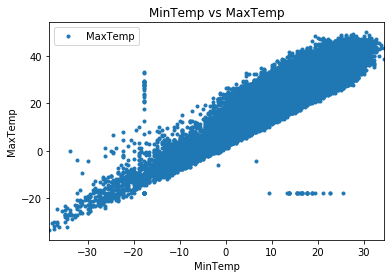

In [5]:
df.plot(x='MinTemp', y='MaxTemp', style='.')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

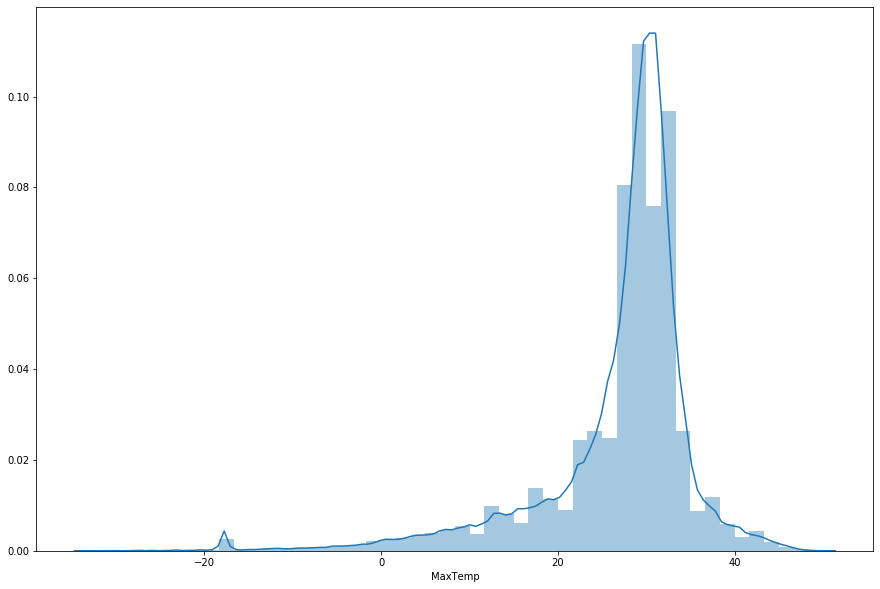

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['MaxTemp'])

In [7]:
X = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)
# X=df.iloc[:,5].values

In [8]:
Xa=df.iloc[:,[5]].values

In [9]:
X

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
li=[]
for i in range(101):
    li.append(regressor.predict([[i]])[0][0])
print(li)

[10.661852008652549, 11.582191975010504, 12.50253194136846, 13.422871907726416, 14.343211874084371, 15.263551840442329, 16.183891806800283, 17.10423177315824, 18.024571739516194, 18.94491170587415, 19.865251672232105, 20.785591638590063, 21.70593160494802, 22.626271571305974, 23.546611537663928, 24.466951504021885, 25.387291470379843, 26.307631436737797, 27.227971403095754, 28.148311369453708, 29.068651335811666, 29.98899130216962, 30.909331268527577, 31.82967123488553, 32.75001120124349, 33.67035116760144, 34.590691133959396, 35.51103110031735, 36.43137106667531, 37.35171103303327, 38.272050999391226, 39.192390965749176, 40.112730932107134, 41.03307089846509, 41.95341086482304, 42.873750831181, 43.794090797538956, 44.714430763896914, 45.63477073025487, 46.55511069661283, 47.475450662970786, 48.39579062932873, 49.31613059568669, 50.236470562044644, 51.1568105284026, 52.07715049476056, 52.99749046111852, 53.917830427476474, 54.83817039383443, 55.75851036019239, 56.67885032655033, 57.599

In [13]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [14]:
y_pred = regressor.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


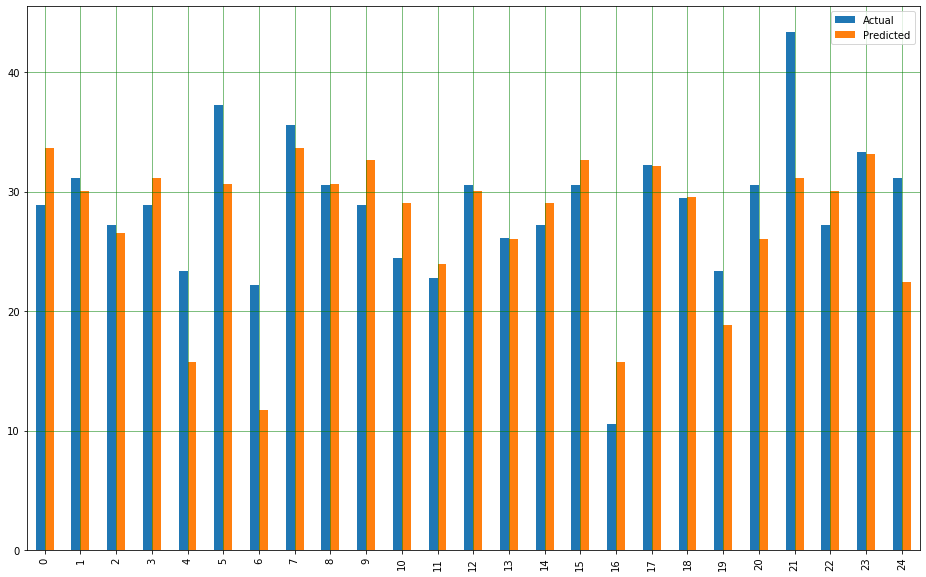

In [15]:
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

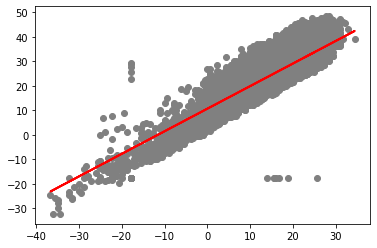

In [16]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785285
Mean Squared Error: 17.631568097568444
Root Mean Squared Error: 4.198996082109204


In [18]:
#Multiple Regression


In [19]:
df.dtypes

STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

In [20]:
df.isnull().any()

STA            False
Date           False
Precip         False
WindGustSpd     True
MaxTemp        False
MinTemp        False
MeanTemp       False
Snowfall        True
PoorWeather     True
YR             False
MO             False
DA             False
PRCP            True
DR              True
SPD             True
MAX             True
MIN             True
MEA             True
SNF             True
SND             True
FT              True
FB              True
FTI             True
ITH             True
PGT             True
TSHDSBRSGF      True
SD3             True
RHX             True
RHN             True
RVG             True
WTE             True
dtype: bool

In [21]:
df = df.fillna(method='ffill')

In [22]:
df.isnull().any()

STA            False
Date           False
Precip         False
WindGustSpd     True
MaxTemp        False
MinTemp        False
MeanTemp       False
Snowfall       False
PoorWeather     True
YR             False
MO             False
DA             False
PRCP           False
DR              True
SPD             True
MAX            False
MIN            False
MEA            False
SNF            False
SND             True
FT              True
FB              True
FTI             True
ITH             True
PGT             True
TSHDSBRSGF      True
SD3             True
RHX             True
RHN             True
RVG             True
WTE             True
dtype: bool

In [23]:
X_m = df[['MeanTemp', 'MinTemp']].values
y_m = df['MaxTemp'].values

In [24]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_m, y_m, test_size=0.2, random_state=0)

In [25]:
regressor = LinearRegression()  
regressor.fit(Xm_train, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
coeff_df = pd.DataFrame(regressor.coef_, ['MinTemp', 'MeanTemp'], columns=['Coefficient'])  
coeff_df

,Coefficient
MinTemp,1.871958
MeanTemp,-0.880633


In [27]:
ym_pred = regressor.predict(Xm_test)

In [28]:
dfm = pd.DataFrame({'Actual': ym_test, 'Predicted': ym_pred})
dfm1 = dfm.head(25)

In [29]:
dfm1

,Actual,Predicted
0,28.888889,29.700248
1,31.111111,31.044980
2,27.222222,27.189829
3,28.888889,29.026522
4,23.333333,22.904211
5,37.222222,36.795599
6,22.222222,21.618253
7,35.555556,34.900131
8,30.555556,30.555739
9,28.888889,29.638753


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ym_test, ym_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ym_test, ym_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ym_test, ym_pred)))

Mean Absolute Error: 0.39909002884597783
Mean Squared Error: 0.90612911079047
Root Mean Squared Error: 0.9519081419918993


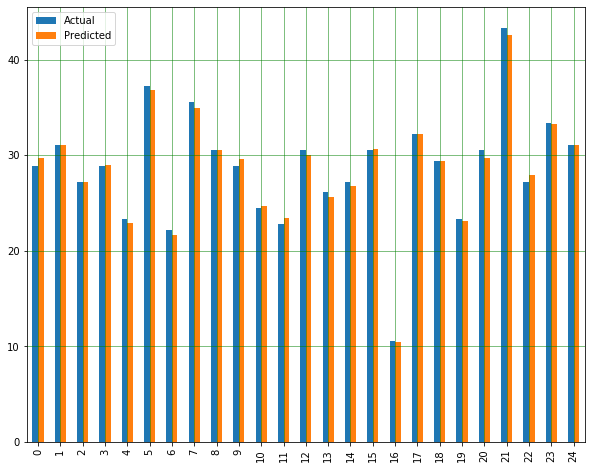

In [31]:
dfm1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()